<a href="https://colab.research.google.com/github/Elibaque/SIM_YAC_ELIANA_UPSE2023/blob/main/Ejercicio_3_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import math


In [2]:
#Datos del yacimiento
L=10000
dx=250
Tiempo=100000
DT=100
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=1**(-6) #ps1-1
A=200000#ft^2

In [3]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

0.4

In [4]:
#Esquema Explicito
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-2*P1+P2)
  return(Pdt)
#Crear matriz que guarda los valores del esquema Explicito
Pexplicita=np.zeros((Tiempo//DT,L//dx))#Al colocar 2 veces el // se obtiene una division exacta

In [5]:
#Condiciones iniciales
Pyac=1000
Piz=500 #Presion izquierda
Pder=100 #Presion derecha
Pin=np.ones(L//dx) #Vector inicial creado  de 1 para poder ingresar la presion de yacimiento
Pres=np.zeros(L//dx) #Vector inicial vacio para colocar los resultados
Pres2=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder

Pin

array([ 500., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000.,  100.])

In [6]:
t=DT
Pexplicita[0]=Pin
while t<Tiempo:# se encarga de ir llenando los datos de los tiempos
  for i in range(0,len(Pin)-1): # se encarga de llenar los datos del espacio
    if i==0: #Condicion inicial cuando i vale 0
      Pres[i]=Pin[0]
    elif i==len(Pin)-1:# Condicion, el valor final del numero de nodos del vector se considerara menos un nodo de acuerdo a python
      Pres[i]=Pin[len(Pin)-1]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)# Se llama a la funcion
  Pexplicita[t//DT]=Pres # Con esta condicion se obtiene el indice de la fila
  t=t+DT# se cambia la condicion para calcular la siguiente fila y seguir con el ciclo
  Pin=Pres


In [7]:
print(Pexplicita)

[[ 500.         1000.         1000.         ... 1000.
  1000.          100.        ]
 [ 500.          800.         1000.         ... 1000.
   640.            0.        ]
 [ 500.          760.          904.         ...  856.
   470.4           0.        ]
 ...
 [ 500.          488.26671795  476.52170103 ...   27.64604703
    13.82411144    0.        ]
 [ 500.          488.262024    476.5123638  ...   27.6373906
    13.81977853    0.        ]
 [ 500.          488.25735032  476.50306688 ...   27.62877155
    13.81546433    0.        ]]


In [8]:
#Se usara una Matriz triagonal pues este esquema depende de cada ecuacion
Pimplicita=np.zeros((Tiempo//DT,L//dx))
#Condiciones inicialeas
Pyac=1000
Piz=500
Pder=100

Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolucion=np.zeros((N-2,N-2))

In [9]:
for i in range(N-2): #por el valor de los nos que se resta 2 por la frontera no se toma en cuenta
   Matriz_resolucion[i,i]= 1+2*Eta #los diagonales son iguales por eso va i,i= se llenan estos valores
   if i>0: #si vale cero
    Matriz_resolucion[i,i-1]=-Eta # casillas de la izquierda
   if i<(N-3): #Porque no hay valores a la derecha
    Matriz_resolucion[i,i+1]=-Eta # casilla derecha de la diagonal


In [10]:
Pcal=np.zeros([N-2]) #Crear un vector vacio del tamaño N-2 resultado de presiones
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1]) # Presion calculada resuelve la ecuacion desde Presion 1 hasta el final -1
Pcal

array([ 765.56443707,  945.03996684,  987.11541369,  996.97939475,
        999.29186271,  999.83398744,  999.96108075,  999.99087594,
        999.997861  ,  999.99949854,  999.99988244,  999.99997244,
        999.99999354,  999.99999849,  999.99999964,  999.99999992,
        999.99999998, 1000.        , 1000.        , 1000.        ,
       1000.        ,  999.99999998,  999.99999992,  999.99999964,
        999.99999849,  999.99999354,  999.99997244,  999.99988244,
        999.99949854,  999.997861  ,  999.99087594,  999.96108075,
        999.83398744,  999.29186271,  996.97939475,  987.11541369,
        945.03996684,  765.56443707])

In [11]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))

In [12]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1]) #Ciclo del Primer sistema de ecuaciones de la presion que se va encontrar desde Presion 1 hasta el final -1
  Pres=np.concatenate(([Piz],Pcal,[Pder]))# Se colocan los valores de frontera
  Pimplicita[t//DT]=Pres # los tres valores se colocan en la matriz
  Pin=Pres #nos indica que va a ir avanzando fila por fila
  t=t+DT # Por cada Dt se va llenando la matriz


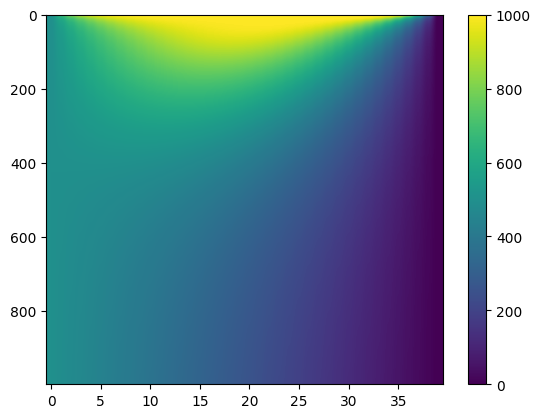

In [13]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()


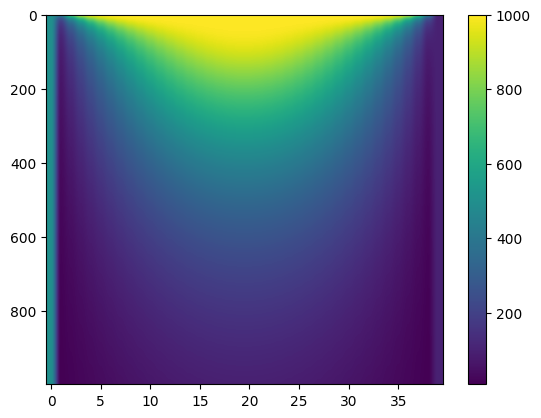

In [14]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()
